## Section 1: Introduction and Data Exploration
**Objective**: This section provides an overview of the Diabetes Health Indicators dataset and performs Exploratory Data Analysis (EDA) to understand the relationships between lifestyle factors and diabetes.

**Significance**: Predicting diabetes is a critical task in public health. Early detection through indicators like BMI, Blood Pressure, and Diet allows for preventative lifestyle changes, reducing the long-term strain on healthcare systems.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the dataset
# the CSV file is in the same folder as our notebook
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Basic check
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


<class 'pandas.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth              70692 no

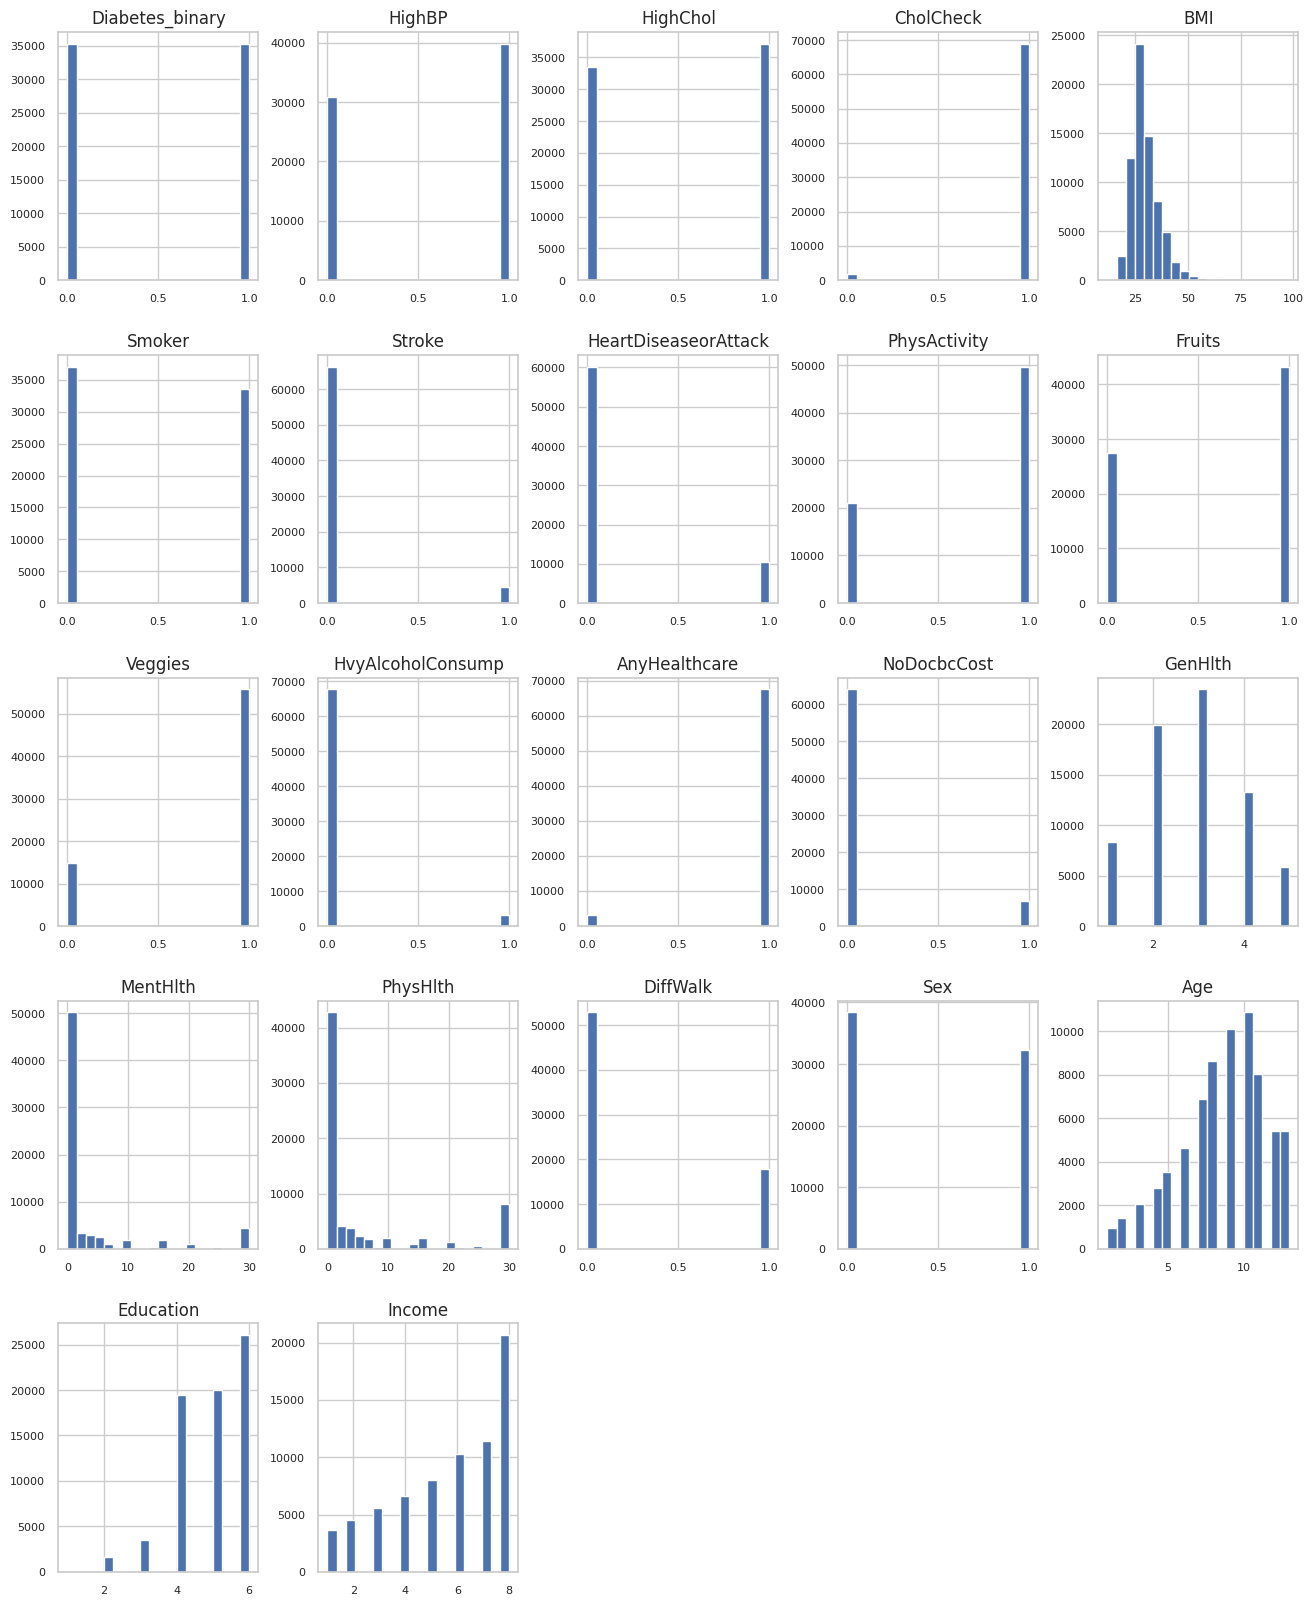

In [33]:
df.info()
df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

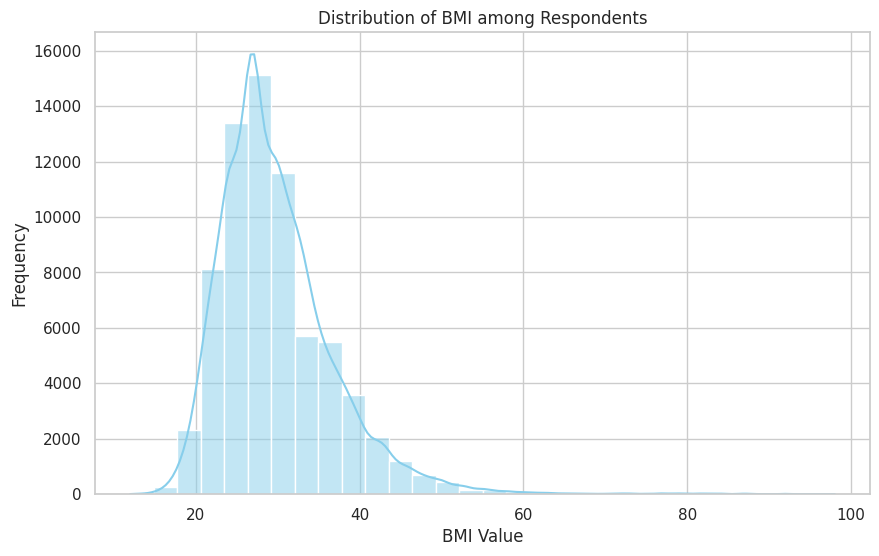

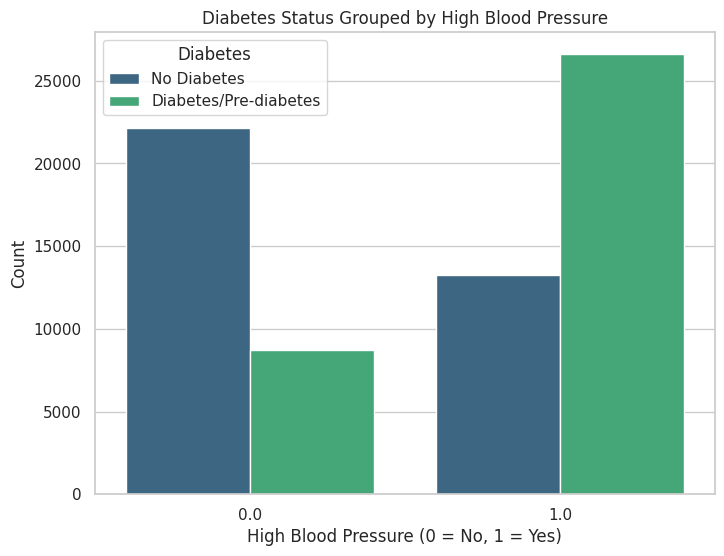

In [34]:
# Set the visual style for all plots
sns.set_theme(style="whitegrid")

# --- Univariate Analysis ---
# We want to see the distribution of BMI in our dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI among Respondents')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')
plt.show()

# --- Bivariate Analysis ---
# We want to see how High Blood Pressure relates to Diabetes status
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df, palette='viridis')
plt.title('Diabetes Status Grouped by High Blood Pressure')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes/Pre-diabetes'])
plt.show()

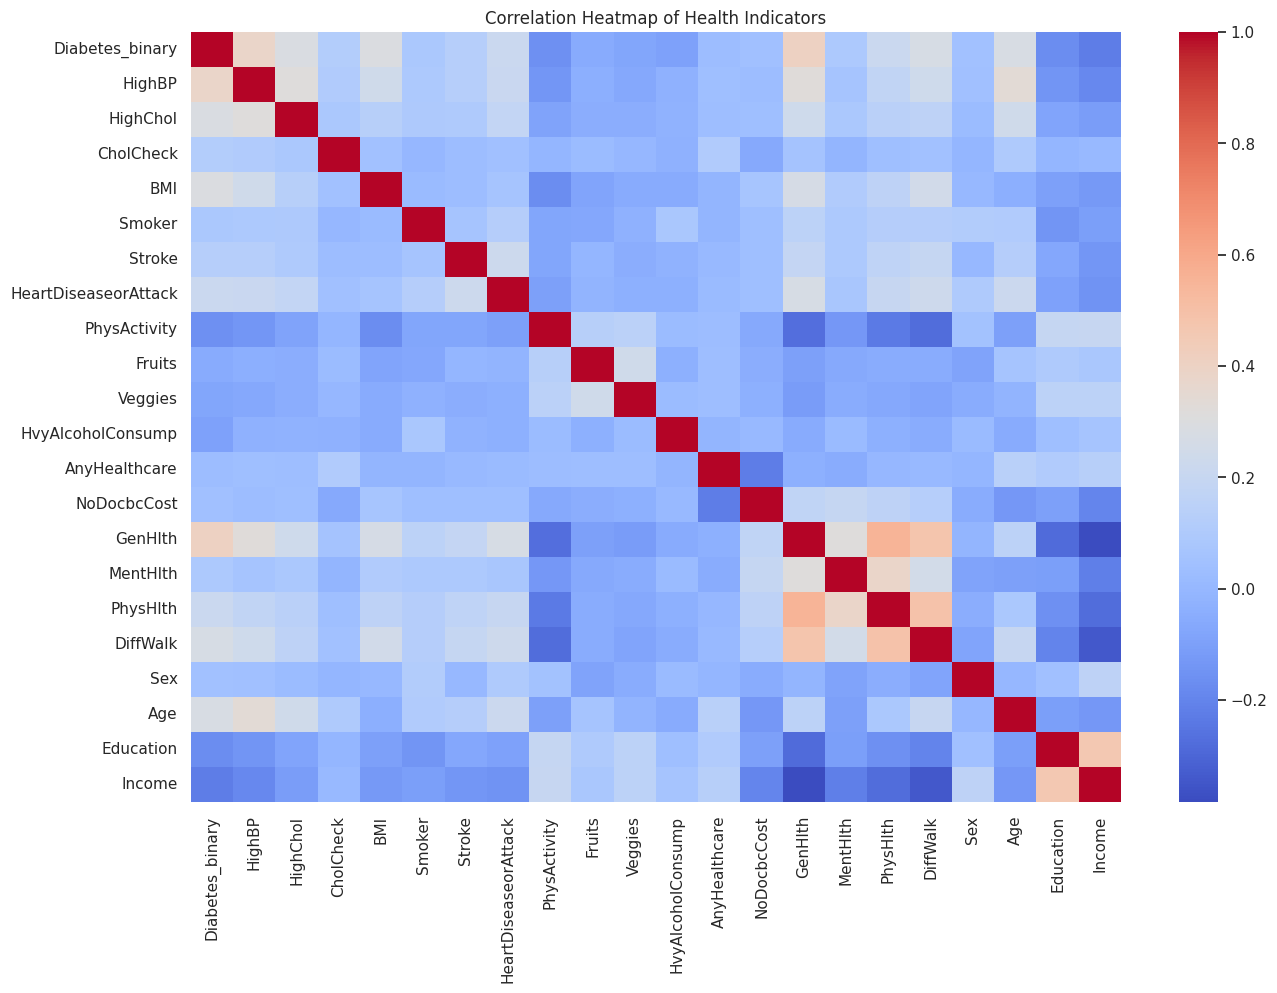

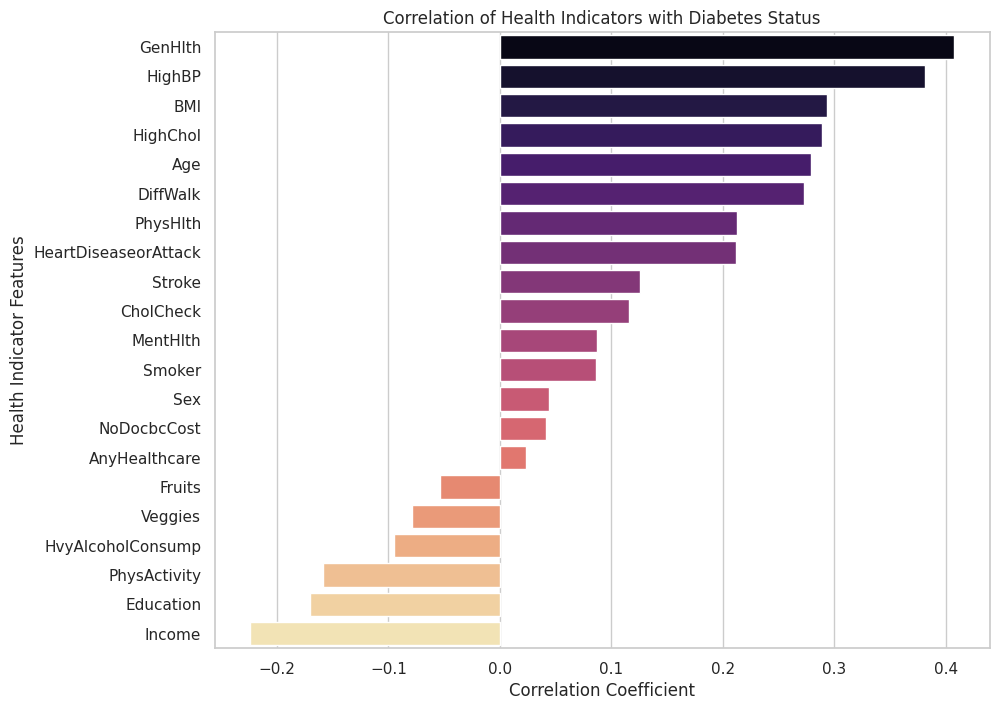

In [35]:
# --- Correlation Analysis ---
# Checking how all features relate to each other to identify patterns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Health Indicators')
plt.show()

# Calculate the correlation of all features specifically with the target variable
# We sort them so the most important features appear at the top
correlations = df.corr()['Diabetes_binary'].sort_values(ascending=False)

# Remove the target variable itself from the list (it would be a perfect 1.0)
correlations = correlations.drop('Diabetes_binary')

# Visualize the correlations using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, hue=correlations.index, palette='magma')
plt.title('Correlation of Health Indicators with Diabetes Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Indicator Features')
plt.show()

## Section 2: Data Cleaning and Pre-processing

Observation on Missing Values: I checked all 21 features and no missing values (NaN) were detected, confirming the dataset is complete and ready for modeling.

Handling Outliers: I specifically analyzed BMI for outliers as it is the primary continuous variable in the dataset. While there are values extending toward 100, I choose to retain them. In medical datasets, these outliers often represent the most high-risk patients (morbid obesity), and removing them would reduce the model's ability to predict diabetes in the very population that needs it most.

The reason I prioritize BMI for a boxplot is that it's a continuous variable. Most of the other features (like HighBP, Smoker, or Stroke) are categorical/binary (0 or 1). Income and Age are ordinal (1-8 or 1-13), so while they have more values than a binary 0/1, they still don't show the same type of "extreme spread" that BMI does.

Missing Values per Column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


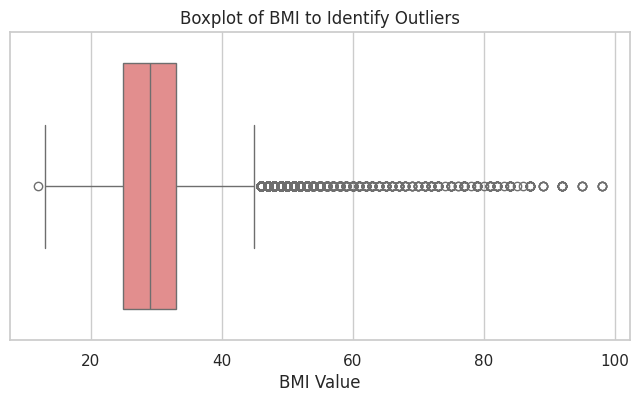

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [36]:
# Check for missing values in all columns
print("Missing Values per Column:")
print(df.isnull().sum())

# Visualizing outliers using a Boxplot for BMI
# Boxplots are the standard way to show outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BMI'], color='lightcoral')
plt.title('Boxplot of BMI to Identify Outliers')
plt.xlabel('BMI Value')
plt.show()

# Descriptive statistics to understand the scale of our 21 features
# This helps us decide if we need to 'scale' the data later
df.describe()

## Section 3: Data Modelling and Data Splitting
The Supervised Learning Task: The prediction of Diabetes_binary is a Supervised Binary Classification problem. It is "supervised" because we have labeled historical data, and "binary" because the output is one of two classes: 0 (No Diabetes) or 1 (Diabetes/Pre-diabetes).

Splitting Strategy: I will use a 70/30 split. 70% of the data will be used to train 4 classification models, and 30% will be held back as a "test set" to evaluate how the models perform on data they have never seen before.

In [37]:
y = df['Diabetes_binary']
# Simple count of each class
print("Raw Counts:")
print(y.value_counts()) #to confirm that the classes are balanced

Raw Counts:
Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffling the dataset to ensure no ordering bias exists
# random_state=42 ensures the shuffle is reproducible
df_shuffled = shuffle(df, random_state=42)

# Separate features (X) and target (y) from the shuffled data
X = df_shuffled.drop('Diabetes_binary', axis=1)
y = df_shuffled['Diabetes_binary']

# Split into Training (70%) and Testing (30%)
# We use stratify=y to ensure the 50/50 balance is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Final Training set size: {X_train.shape[0]} samples")
print(f"Final Testing set size: {X_test.shape[0]} samples")

Final Training set size: 49484 samples
Final Testing set size: 21208 samples


## Section 4: Model Selection
Objective: To select four distinct classification algorithms that offer different mathematical approaches to the problem. This variety allows us to compare how "linear" vs "non-linear" models handle health survey data.

**Chosen Models:**

**Logistic Regression**: A fundamental linear model. It is highly interpretable and serves as our "baseline." It works well when the relationship between features and the target is relatively simple.

**Random Forest Classifier**: An "ensemble" method that builds multiple decision trees. It is robust to outliers and excellent at capturing complex interactions between health factors.

**Support Vector Machine (SVM)**: A model that finds the optimal "boundary" between classes. It is very powerful for binary classification in high-dimensional spaces (like our 21 features).

**K-Nearest Neighbors (KNN)**: A model that classifies a person based on how similar their health profile is to others in the dataset. It is intuitive and non-parametric.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Initializing the Scaler
# we use StandardScaler to give all features a mean of 0 and variance of 1
scaler = StandardScaler()

# Scaling the features
# we 'fit' only on the training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the 4 models with default parameters for now
# We set random_state where possible for reproducibility
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_svm = LinearSVC(max_iter=5000, random_state=42) 
model_knn = KNeighborsClassifier()

print("Features scaled and models initialized successfully.")

Features scaled and models initialized successfully.


## Section 5: Model Training and Hyperparameter Tuning
Objective: To train the four selected models and optimize their performance through hyperparameter tuning and cross-validation.

Training Process: Each model is first trained on the scaled training set. To ensure the reliability of the results, I utilized 5-Fold Cross-Validation. This involves splitting the training data into five parts, training on four, and validating on the fifth, repeating the process five times.

Hyperparameter Tuning: I use RandomizedSearchCV for tuning the hyperparameters of the different models. Exhaustive grid search is computationally expensive and time consuming.

Starting 5-Fold Cross-Validation...

Before Tuning: Cross-Validation Performance
---------------------------------------------------------------------------
Model Name                | CV Accuracy     | CV F-Score     
---------------------------------------------------------------------------
Logistic Regression       | 0.7478          | 0.7527
Random Forest             | 0.7370          | 0.7471
LinearSVM                 | 0.7474          | 0.7539
KNN                       | 0.7100          | 0.7167


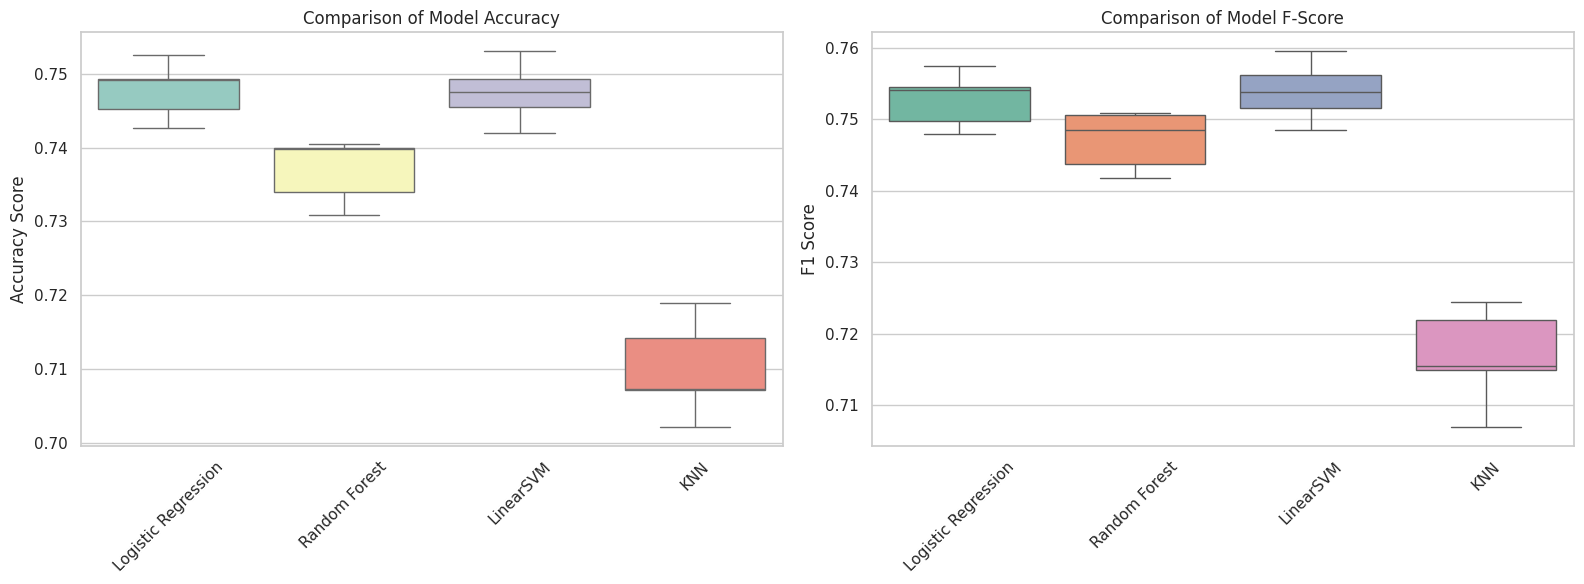

In [40]:
from sklearn.model_selection import cross_validate
import time

# Create a list of initialized models
models = [
    ('Logistic Regression', model_lr),
    ('Random Forest', model_rf),
    ('LinearSVM', model_svm),
    ('KNN', model_knn),
]

# Dictionaries to store results
cv_results_acc = {}
cv_results_f1 = {}
train_times = {}

print("Starting 5-Fold Cross-Validation...\n")
print("Before Tuning: Cross-Validation Performance")
print("-" * 75)
print(f"{'Model Name':25} | {'CV Accuracy':15} | {'CV F-Score':15}")
print("-" * 75)

for name, model in models:
    start = time.time()
    
    # Use cross_validate to get multiple metrics at once
    scores = cross_validate(model, X_train_scaled, y_train, cv=5, 
                            scoring=['accuracy', 'f1'])
    
    end = time.time()
    
    # Store results for visualization
    cv_results_acc[name] = scores['test_accuracy']
    cv_results_f1[name] = scores['test_f1']
    train_times[name] = (end - start) 
    
    print(f"{name:25} | {scores['test_accuracy'].mean():.4f}          | {scores['test_f1'].mean():.4f}")

# Visualization of Cross-Validation Results (Accuracy vs F-Score)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy Boxplot
sns.boxplot(data=pd.DataFrame(cv_results_acc), palette='Set3', ax=ax[0])
ax[0].set_title('Comparison of Model Accuracy')
ax[0].set_ylabel('Accuracy Score')
ax[0].tick_params(axis='x', rotation=45)

# F-Score Boxplot
sns.boxplot(data=pd.DataFrame(cv_results_f1), palette='Set2', ax=ax[1])
ax[1].set_title('Comparison of Model F-Score')
ax[1].set_ylabel('F1 Score')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, f1_score

# Defining the parameter grids for each model
param_lr = {'C': [0.1, 1, 10], 'max_iter': [1000]}
param_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'random_state': [42]}
param_svm = {'C': [0.1, 1, 10], 'max_iter': [5000], 'random_state': [42]}
param_knn = {'n_neighbors': [3, 5, 11]}

# We will store the 'Best' version of each model here
tuned_models = {}

# Configuration list using your specific variable names
search_configs = [
    ('Logistic Regression', LogisticRegression(random_state=42), param_lr),
    ('Random Forest', RandomForestClassifier(random_state=42), param_rf),
    ('LinearSVM', LinearSVC(random_state=42), param_svm),
    ('KNN', KNeighborsClassifier(), param_knn),
]

print("Starting Hyperparameter Tuning...")

for name, model, params in search_configs:
    # We use cv=3 for speed during tuning
    # We optimize for F1-score to ensure balance between Precision and Recall
    rs = RandomizedSearchCV(model, params, n_iter=2, cv=3, scoring='f1', random_state=42)
    rs.fit(X_train_scaled, y_train)
    
    # Store the best estimator
    tuned_models[name] = rs.best_estimator_
    print(f"Finished tuning {name}. Best Params: {rs.best_params_}")

print("\nAll models have been tuned and are ready for evaluation.")

Starting Hyperparameter Tuning...
Finished tuning Logistic Regression. Best Params: {'max_iter': 1000, 'C': 0.1}
Finished tuning Random Forest. Best Params: {'random_state': 42, 'n_estimators': 200, 'max_depth': 10}
Finished tuning LinearSVM. Best Params: {'random_state': 42, 'max_iter': 5000, 'C': 1}
Finished tuning KNN. Best Params: {'n_neighbors': 5}

All models have been tuned and are ready for evaluation.


In [42]:
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
import time

# ENSEMBLE BUILDING 

# 1. Hard Voting Ensemble (Majority Rule)
start = time.time()
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', tuned_models['Logistic Regression']),
        ('rf', tuned_models['Random Forest']),
        ('svm', tuned_models['LinearSVM']), 
        ('knn', tuned_models['KNN']),
    ],
    voting='hard'
)
voting_clf_hard.fit(X_train_scaled, y_train)
end = time.time()
train_times['Hard Voting Ensemble'] = end - start
tuned_models['Hard Voting Ensemble'] = voting_clf_hard

# 2. Soft Voting Ensemble (Weighted Probability)
# We calibrate SVM so it can provide probability estimates for soft voting
calibrated_svm = CalibratedClassifierCV(tuned_models['LinearSVM'], method='sigmoid', cv=5)
calibrated_svm.fit(X_train_scaled, y_train)

start = time.time()
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', tuned_models['Logistic Regression']),
        ('rf', tuned_models['Random Forest']),
        ('svm', calibrated_svm),
        ('knn', tuned_models['KNN']),
    ],
    voting='soft', 
    weights=[3, 3, 2, 1]
)
voting_clf_soft.fit(X_train_scaled, y_train)
tuned_models['Soft Voting Ensemble'] = voting_clf_soft
end = time.time()
train_times['Soft Voting Ensemble'] = end - start

# ----CROSS-VALIDATION SUMMARY-----
print("After Tuning: Cross-Validation Performance")
print("-" * 70)
print(f"{'Model Name':25} | {'CV Accuracy':15} | {'CV F-Score':15}")
print("-" * 70)

for name, model in tuned_models.items():
    # Calculate Mean Accuracy
    acc_score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy').mean()
    
    # Calculate Mean F1-Score
    f1_val = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    
    # Print both metrics
    print(f"{name:25} | {acc_score:.4f}          | {f1_val:.4f}")

After Tuning: Cross-Validation Performance
----------------------------------------------------------------------
Model Name                | CV Accuracy     | CV F-Score     
----------------------------------------------------------------------
Logistic Regression       | 0.7478          | 0.7528
Random Forest             | 0.7503          | 0.7606
LinearSVM                 | 0.7478          | 0.7543
KNN                       | 0.7102          | 0.7173
Hard Voting Ensemble      | 0.7487          | 0.7514
Soft Voting Ensemble      | 0.7497          | 0.7578


## Section 6: Model Performance Evaluation and Improvement
Selection of Metrics: While Accuracy provides a general overview, I also used Precision, Recall, and the F1-Score for a deeper analysis.

Recall is vital in this health context as it measures our ability to correctly identify all patients with diabetes, minimizing "False Negatives."

F1-Score acts as a balanced measure, ensuring our model doesn't sacrifice precision for recall.

Performance Improvement: By comparing the default models to our tuned and ensemble versions, we can quantify the impact of hyperparameter optimization and algorithm selection on both predictive power and computational efficiency.

In [43]:
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score

# Creating a list to store all results
results_list = []

# Loop through our tuned_models dictionary to get metrics for each
for name, model in tuned_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store in list
    results_list.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# Convert to a DataFrame for clean display
results_df = pd.DataFrame(results_list).sort_values(by='Accuracy', ascending=False)

# Display the table
print("Final Model Performance Comparison:")
results_df.reset_index(drop=True, inplace=True)
results_df

Final Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Soft Voting Ensemble,0.750283,0.734328,0.784327,0.758504
1,Random Forest,0.749717,0.728237,0.796775,0.760966
2,Hard Voting Ensemble,0.747925,0.742259,0.759619,0.750839
3,Logistic Regression,0.747737,0.737781,0.768672,0.752910
4,LinearSVM,0.746888,0.733750,0.774991,0.753807
5,KNN,0.708836,0.698806,0.734063,0.716001


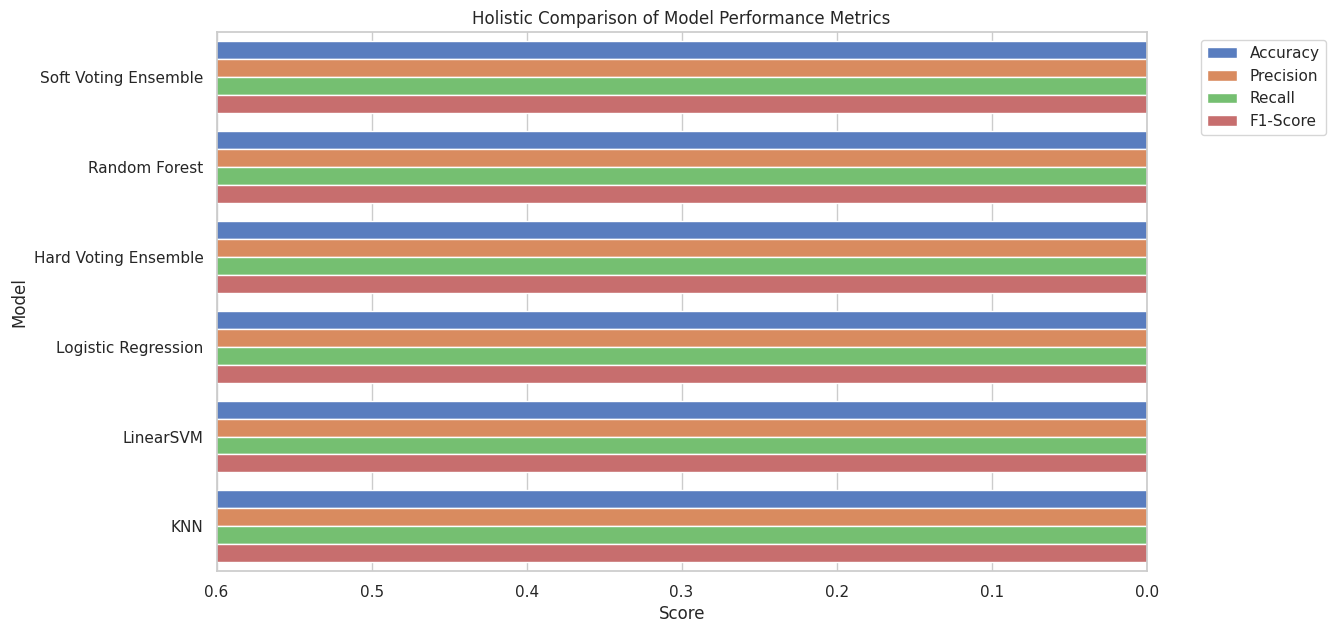

In [44]:
# Melt the dataframe to make it easier to plot with Seaborn
plot_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Score', y='Model', hue='Metric', data=plot_df, palette='muted')
plt.title('Holistic Comparison of Model Performance Metrics')
plt.xlim(0.6, 0.) # Zooming in to see the differences clearly
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

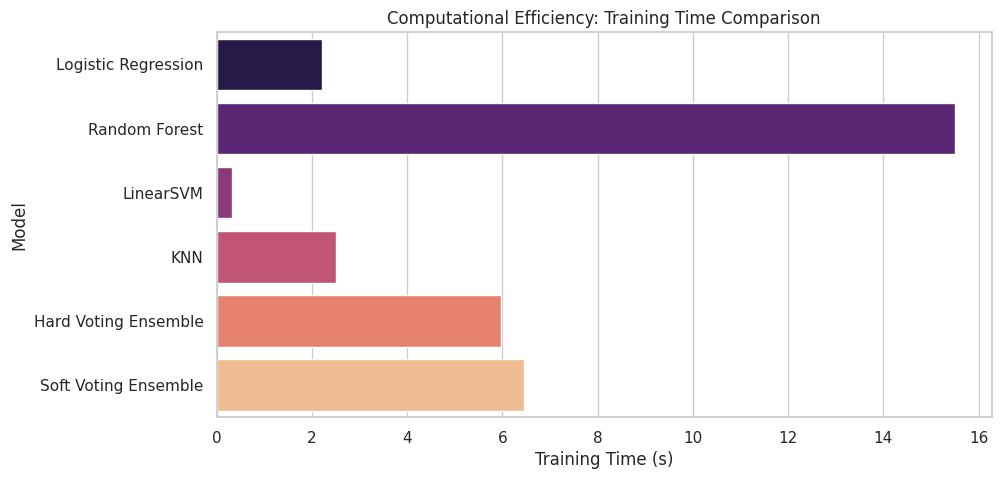

In [45]:
# using the 'train_times' from Section 5 we can compare computational efficiency
time_df = pd.DataFrame(list(train_times.items()), columns=['Model', 'Training Time (s)'])

plt.figure(figsize=(10, 5))
sns.barplot(x='Training Time (s)', y='Model', data=time_df, hue='Model', palette='magma')
plt.title('Computational Efficiency: Training Time Comparison')
plt.show()

## Section 7: Results Visualization and Discussion
Objective: To visualize the predictive behavior of the models using Confusion Matrices and ROC Curves. This section provides a visual comparison of all trained models to evaluate their predictive reliability.

Confusion Matrix Insights: This allows us to see exactly where the model is making mistakes,specifically, identifying whether it struggles more with "False Positives" (predicting diabetes when there is none) or "False Negatives" (missing actual cases).

ROC Curve Insights: The Area Under the Curve (AUC) measures the model's ability to distinguish between classes. An AUC closer to 1.0 indicates a superior classifier.

By overlaying the ROC curves, we can visualize the trade-off between the True Positive Rate and False Positive Rate across different thresholds. The Confusion Matrices further clarify the types of errors (Type I and Type II) each model is prone to making, which is critical for medical screening applications.

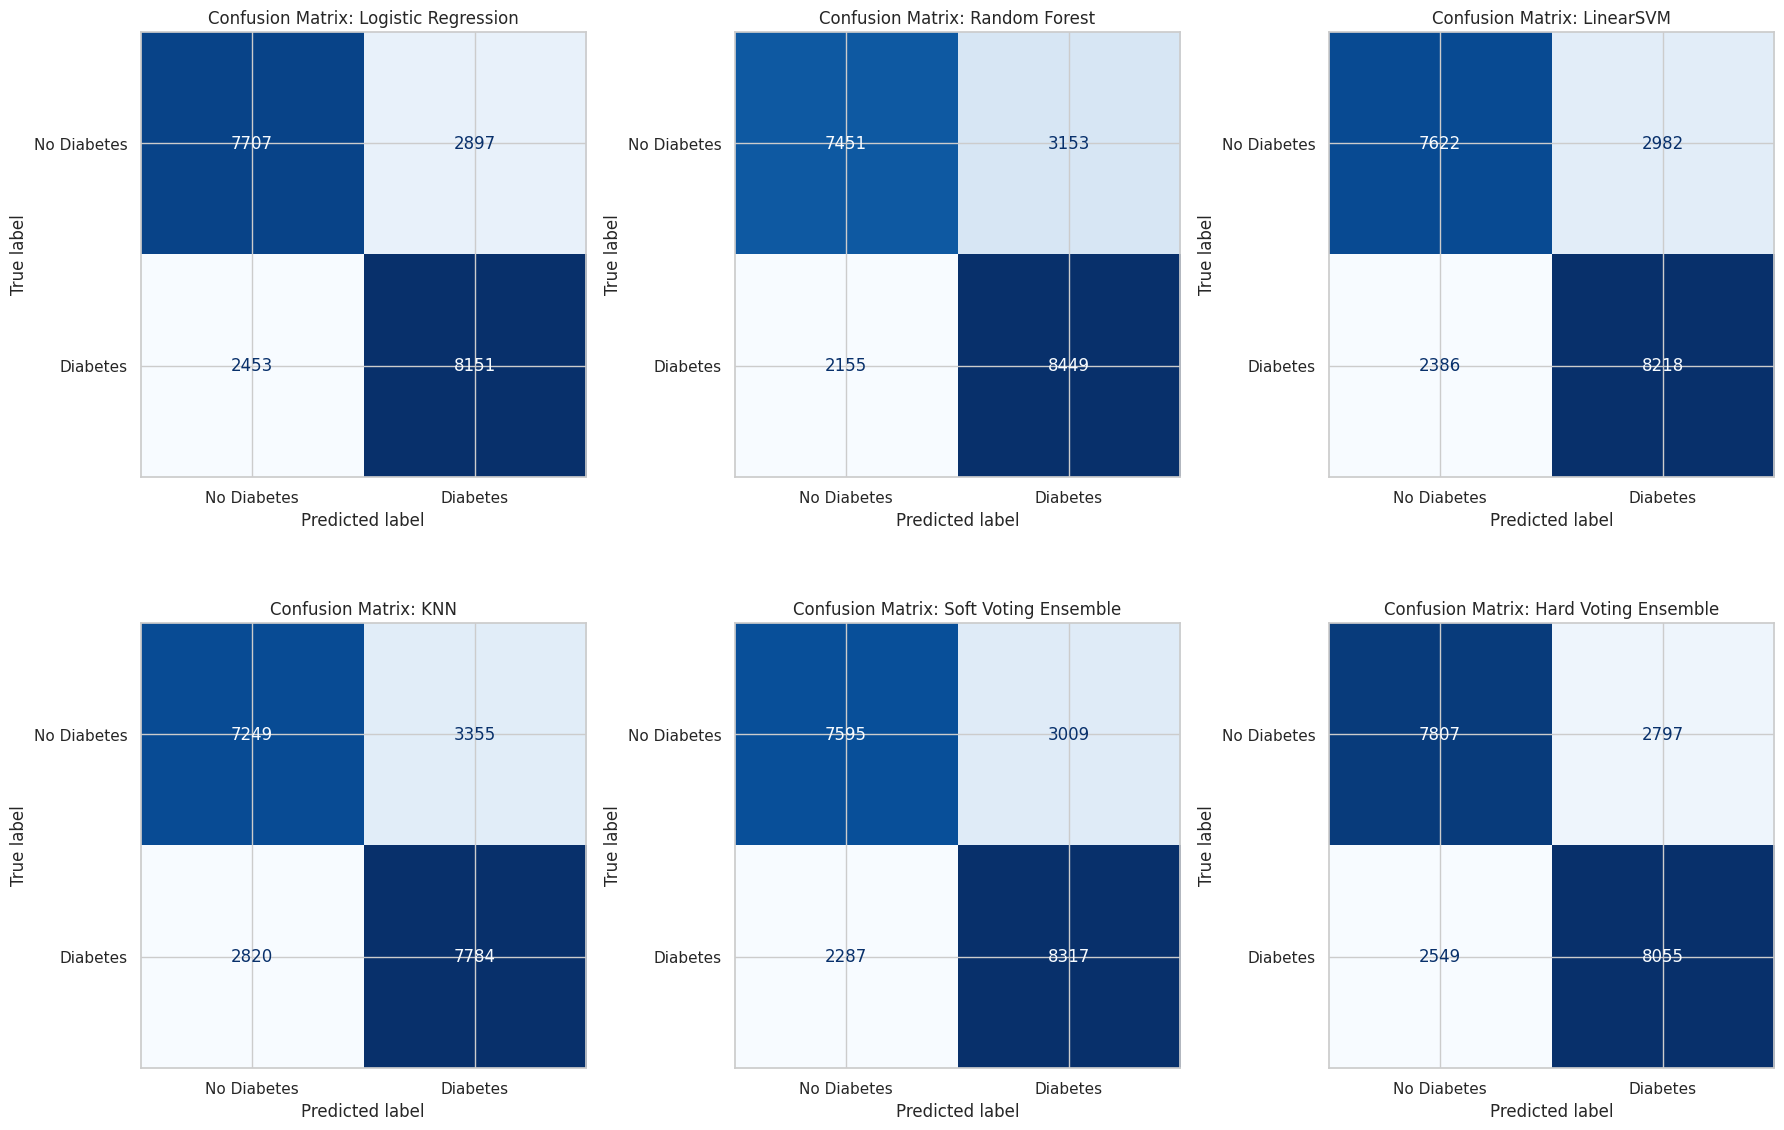

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# We will plot the 4 primary models and the 2 ensembles in a 2x3 grid
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# List of models to visualize
model_names = ['Logistic Regression', 'Random Forest', 'LinearSVM', 'KNN', 'Soft Voting Ensemble', 'Hard Voting Ensemble']

for i, name in enumerate(model_names):
    model = tuned_models[name]
    y_pred = model.predict(X_test_scaled)
    
    # Plotting on the specific subplot axis
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, 
        ax=axes[i], 
        display_labels=['No Diabetes', 'Diabetes'], 
        cmap='Blues', 
        colorbar=False
    )
    axes[i].set_title(f"Confusion Matrix: {name}")

plt.tight_layout()
plt.show()

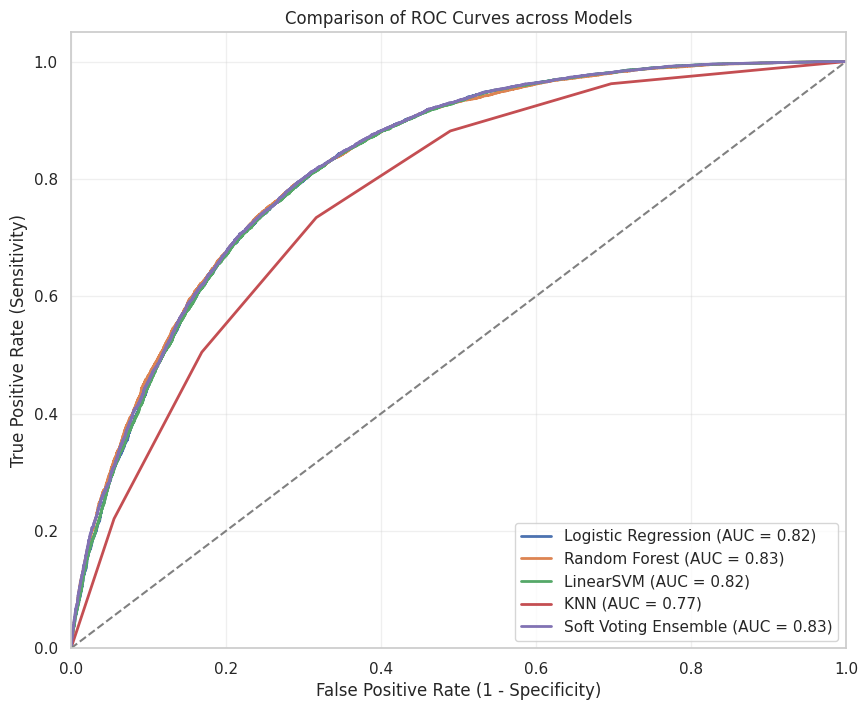

In [47]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Define the models we want to compare on the ROC plot
# We use the models that can provide probabilities
roc_models = ['Logistic Regression', 'Random Forest', 'LinearSVM', 'KNN', 'Soft Voting Ensemble']

for name in roc_models:
    model = tuned_models[name]
    
    # Get probabilities for the positive class
    if name == "LinearSVM":
        y_probs = calibrated_svm.predict_proba(X_test_scaled)[:,1]
    else: 
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 'Random Guess' line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Comparison of ROC Curves across Models')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

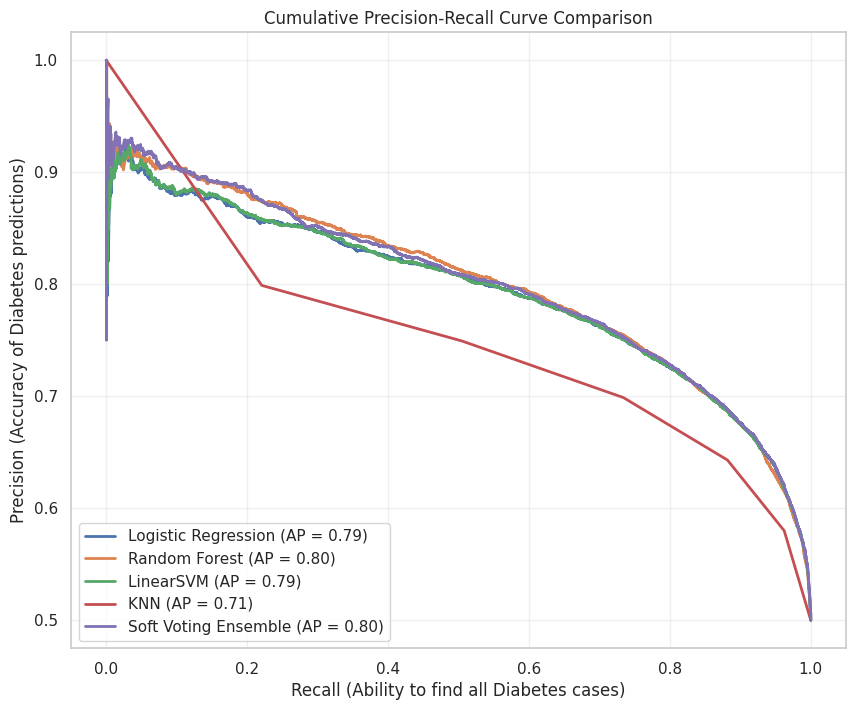

In [48]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

# We use the same models as the ROC curve
for name in roc_models:
    model = tuned_models[name]
    if name == "LinearSVM":
        y_probs = calibrated_svm.predict_proba(X_test_scaled)[:,1]
    else: 
        y_probs = model.predict_proba(X_test_scaled)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    ap_score = average_precision_score(y_test, y_probs)
    
    plt.plot(recall, precision, lw=2, label=f'{name} (AP = {ap_score:.2f})')

plt.xlabel('Recall (Ability to find all Diabetes cases)')
plt.ylabel('Precision (Accuracy of Diabetes predictions)')
plt.title('Cumulative Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

## Section 8: Summary

### 1. Key Learnings

- Computational Efficiency and Algorithm Complexity: I learned the critical importance of selecting the right kernel based on dataset size. Initially, using the default RBF kernel for SVM took approximately 40 minutes to train. This is because the RBF kernel has a time complexity of approximately $O(n^{2})$, as it compares every data point to every other point. Given our large training set (~49,000 samples), this became a bottleneck. Switching to Linear SVM reduced training time to about one second with nearly identical accuracy. This shows that when the number of features (21) is relatively high, a linear boundary is often as effective as a complex curved one.

- The Power of Balanced Data and the F-Score: I gained a deep appreciation for the F-score (Precision and Recall) over simple accuracy. The original Kaggle dataset had a highly imbalanced 85:15 ratio (~250,000 traning examples). In such cases, a model could achieve 85% accuracy simply by predicting "No Diabetes" for everyone, while having a Recall of 0, which is useless and misleading. For this project, I used the balanced dataset which has 50/50 split of the two classes. I still used the F-score because, in healthcare particulary recall is highly relevant since the risk of a "False Negative" (misclassifying a diabetic person as healthy) need to be minimized as much as possible.

- Maximum Signal Extraction and Performance Ceilings: I discovered that even with advanced hyperparameter tuning and ensemble methods, accuracy tended to plateau around 75%. This is likely the "performance ceiling" of the dataset. Since the data is derived from self-reported surveys, it contains inherent noise, misreporting, and lacks critical biological features like genetics or other important features that correlate with diabetics. Reaching ~74-76% accuracy is a robust result that aligns with the benchmarks of other ML practitioners using this specific dataset.



### 2. Complete ML Diagram

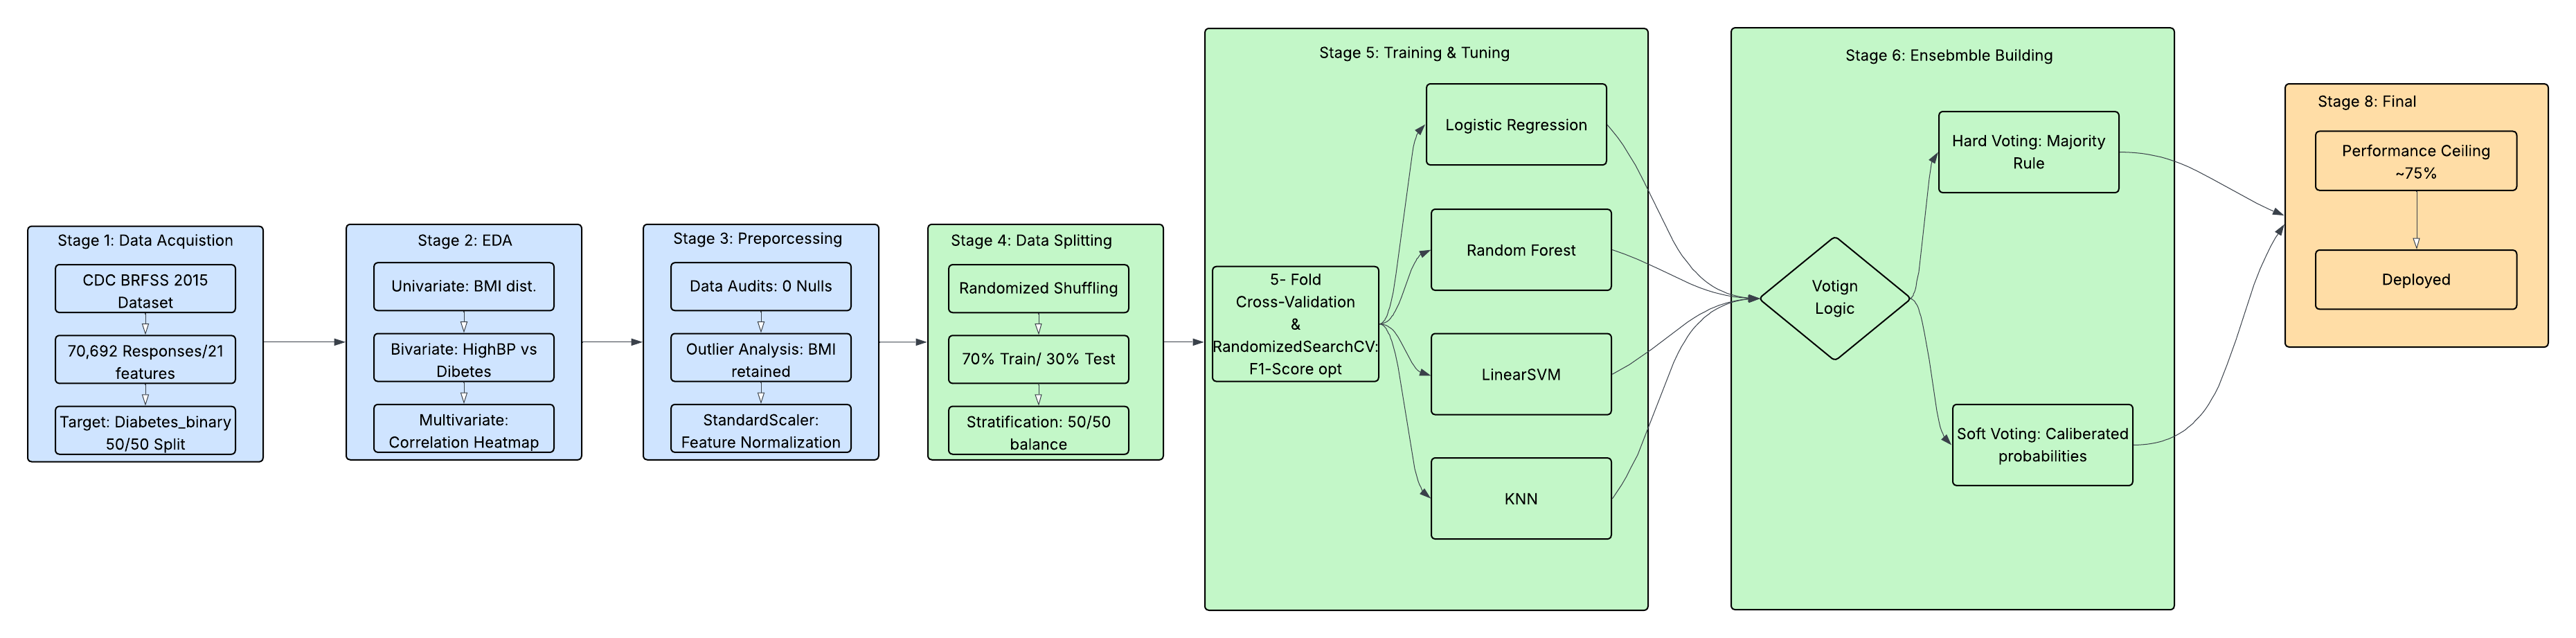

### Strengths and Weaknesses of the Approach
**Strengths:**
I used careful stratification and cross-validation. By maintaining a 50/50 balance in the 70/30 data split and validating across 5 different folds, I made sure the results reflect the general population rather than just random chance.
I created Soft Voting ensemble using weighted contributions from different models (Random Forest: 3, Logistic Regression: 3, LinearSVM: 2, KNN: 1). This approach combined the strengths of various algorithms, leading to slightly better overall accuracy

**Weaknesses:**
A key weakness is that our model relies on self-reported survey data. Without precise clinical measurements, like actual blood glucose levels, the model can't provide a conclusive medical diagnosis. 
To keep my analysis efficient, I chose LinearSVC instead of a more complex model. While this reduced training time, it may overlook more intricate, non-linear patterns that a more powerful method might have captured.


**--- END! ---**